In [7]:
import numpy as np
import matplotlib.pyplot as plt

name_str='normal-distribution-frequency-65-seed-{}.npz'
sample_list = np.arange(1000,1100,10)
std_w_range = np.arange(0.01,0.4,0.1)
axis_std_w1 = np.arange(0.01, 1, 0.09)[:-1]
axis_std_w2 = np.arange(0.01, 1, 0.09)[:-1]
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
test_accuracy_10_samples = np.zeros((10, 10,10))


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


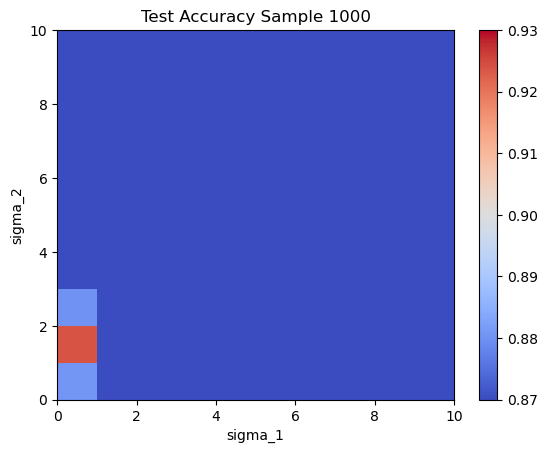

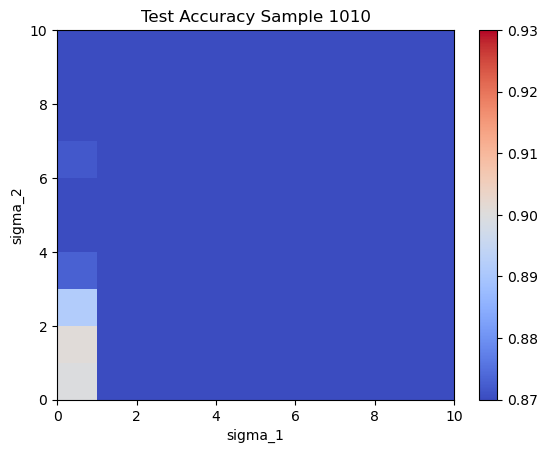

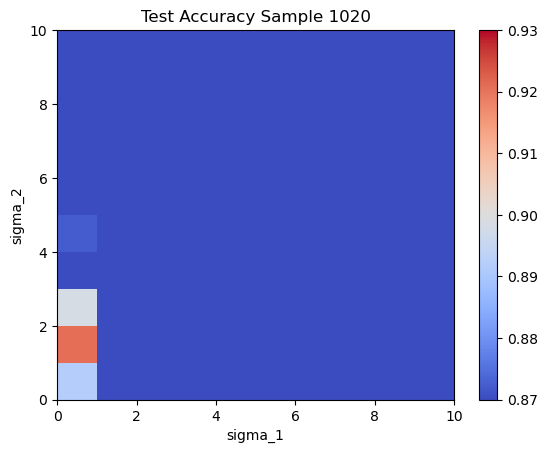

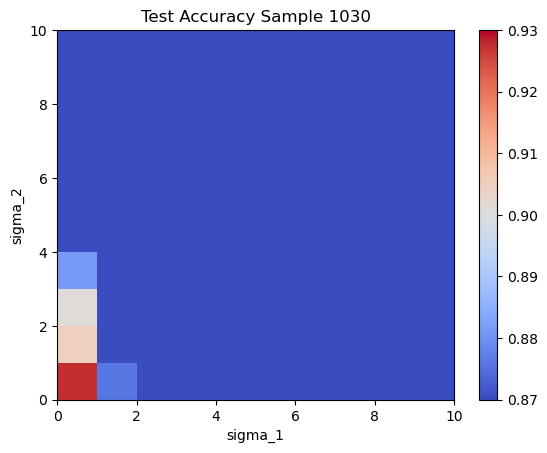

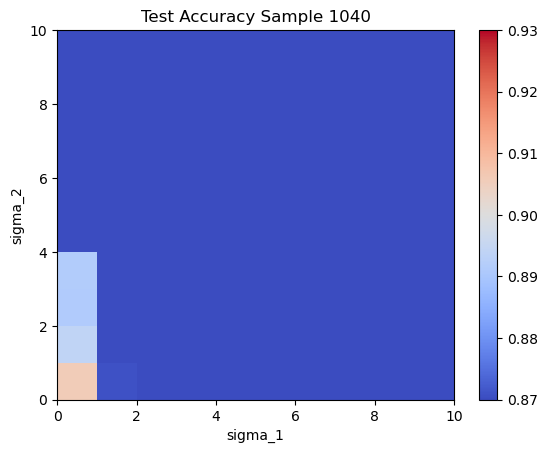

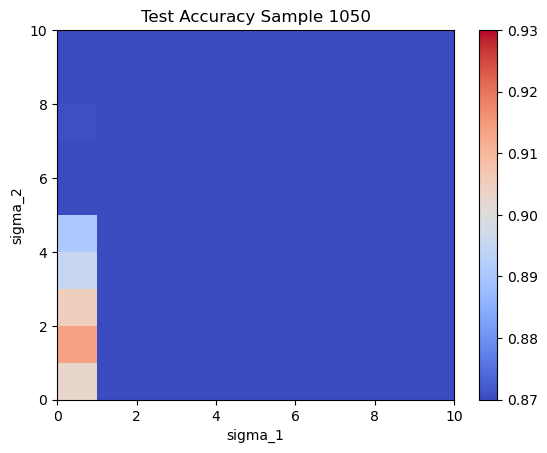

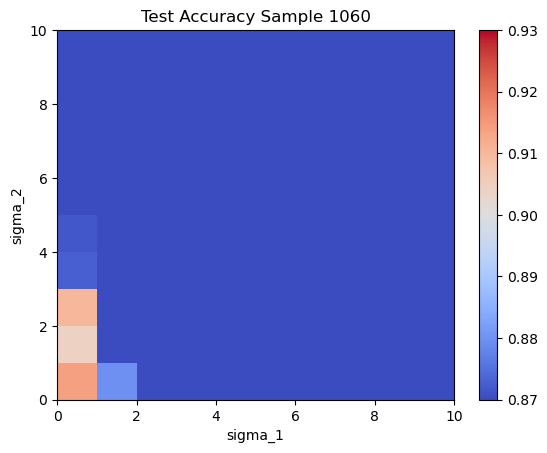

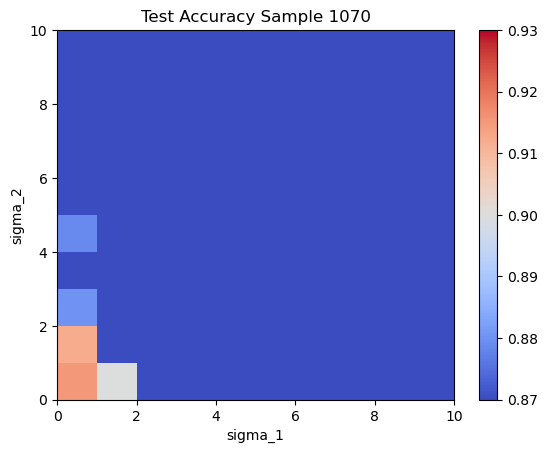

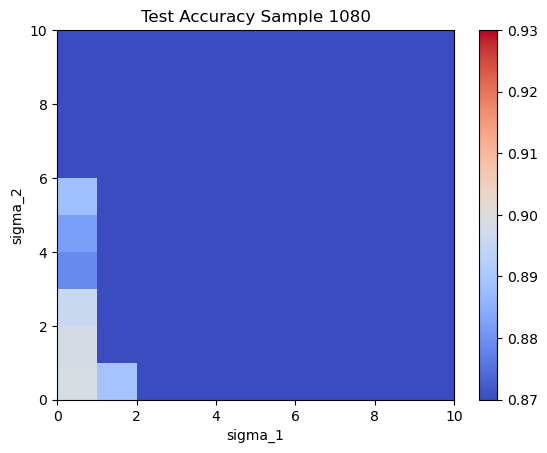

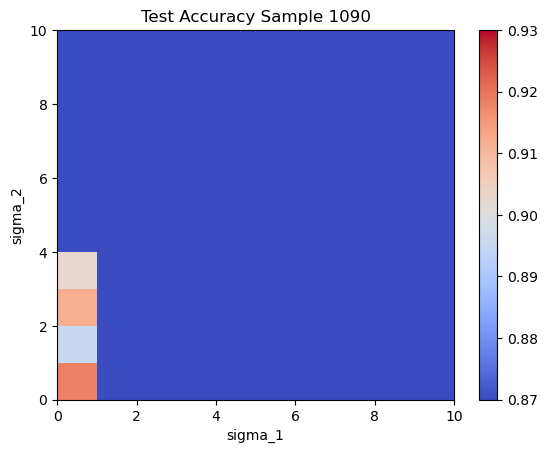

In [40]:
list= np.array([])
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(i))
    fig = plt.figure()
    ax = plt.axes()
    b = ax.pcolormesh(data['test_accuracy_w1_w2'].T, cmap ='coolwarm', vmin=0.87, vmax=0.93)
    plt.colorbar(b)
    ax.set_xlabel('sigma_1')
    ax.set_ylabel('sigma_2')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]
    max_accuracy = np.max(data['test_accuracy_w1_w2'])
    index_max_accuracy = np.argmax(data['test_accuracy_w1_w2'])
    test_best_w1_w2 = np.unravel_index(index_max_accuracy, data['test_accuracy_w1_w2'].shape)
    values = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005
    np.append(list, values)
    print(list)

In [19]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
std_dev_test_accuracy_grid_10_by_10_10_samples = np.std(test_accuracy_10_samples, axis=0)

In [20]:
average_test_accuracy_grid_10_by_10_10_samples

array([[0.90545873, 0.90683093, 0.89643429, 0.8765625 , 0.86289062,
        0.84661458, 0.84220753, 0.8341246 , 0.83438502, 0.80070112],
       [0.86852965, 0.78023838, 0.69370994, 0.61011619, 0.56459335,
        0.52063301, 0.49935897, 0.48779046, 0.44361979, 0.45242388],
       [0.84464143, 0.73293269, 0.57486979, 0.46863982, 0.4198117 ,
        0.36835937, 0.38033854, 0.35431691, 0.34786659, 0.34817708],
       [0.82505008, 0.70197316, 0.49206731, 0.40445713, 0.35749199,
        0.31670673, 0.33114984, 0.30161258, 0.3132512 , 0.31831931],
       [0.78839143, 0.66998197, 0.44198718, 0.36922075, 0.31830929,
        0.28277244, 0.30794271, 0.28778045, 0.29387019, 0.304377  ],
       [0.77401843, 0.65277444, 0.4090645 , 0.34721554, 0.29828726,
        0.26875   , 0.29440104, 0.27326723, 0.28318309, 0.30597957],
       [0.76183894, 0.64546274, 0.40715144, 0.32599159, 0.29148638,
        0.26526442, 0.28832131, 0.26861979, 0.28015825, 0.29286859],
       [0.74913862, 0.63223157, 0.3900941

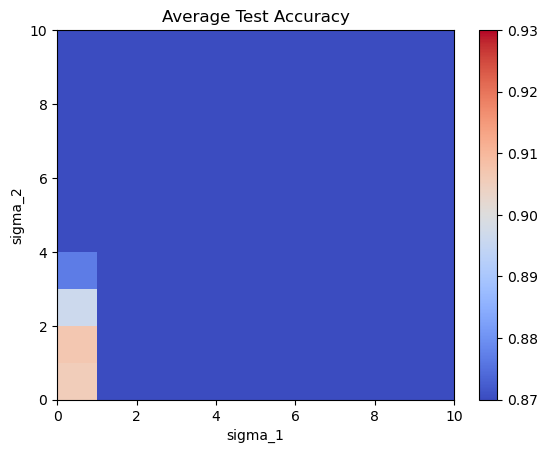

In [21]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(average_test_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', vmin= 0.87, vmax=0.93)
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_test_accuracy_grid_100.png".format(sample))

In [22]:
average_test_accuracy_grid_10_by_10_10_samples >= 0.999*np.max(average_test_accuracy_grid_10_by_10_10_samples)

array([[False,  True, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [23]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_test_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax(average_test_accuracy_grid_10_by_10_10_samples)
test_best_w1_w2 = np.unravel_index(index_max_accuracy, average_test_accuracy_grid_10_by_10_10_samples.shape)

In [24]:
list

array([], dtype=float64)

In [25]:
test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005

In [16]:
test_best_w1_best_w2

array([0.0125, 0.0275])

In [17]:
data = {}
data['frequency'] = 65
data['N'] = 100
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.0075/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.0075/0.3445
np.savez("test_accuracy_100",**data)